# ★ 실무 실습) 배포 받은 "전력사용량 예측 데이터"를 통해 자신만의 코드를 작성 해보자

1. 이제까지 배운 회귀 방법들을 통해 적용해보자.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.

 [시각화는 scatter plot, correlation plot. 통계는 describe 정도 출력해도 좋다.]

3. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df = pd.read_csv('train.csv', encoding = 'cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [ ]:
df.isnull().sum() # 결측 없음

,0
num,0
date_time,0
전력사용량(kWh),0
기온(°C),0
풍속(m/s),0
습도(%),0
강수량(mm),0
일조(hr),0
비전기냉방설비운영,0
태양광보유,0


In [ ]:
df.rename(columns={
    '전력사용량(kWh)': '전력사용량'
    '기온(°C)': '기온',
    '풍속(m/s)': '풍속',
    '습도(%)': '습도',
    '강수량(mm)': '강수량',
    '일조(hr)': '일조'
}, inplace=True)

In [ ]:
df.head()

,num,date_time,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


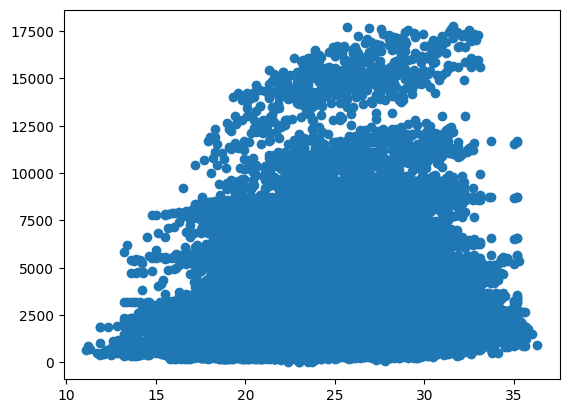

In [ ]:
# scatter plot
import matplotlib.pyplot as plt

plt.scatter(df['기온'], df['전력사용량'])
plt.show()

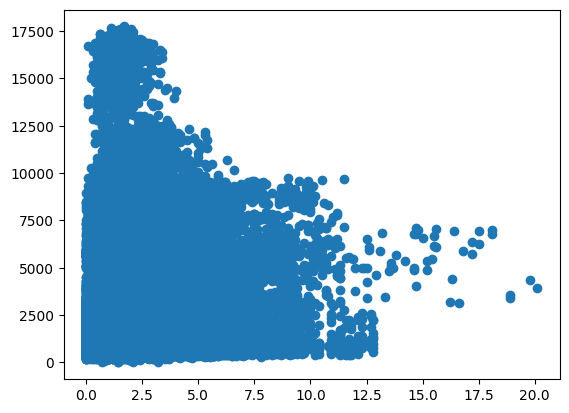

In [ ]:
plt.scatter(df['풍속'], df['전력사용량'])
plt.show()

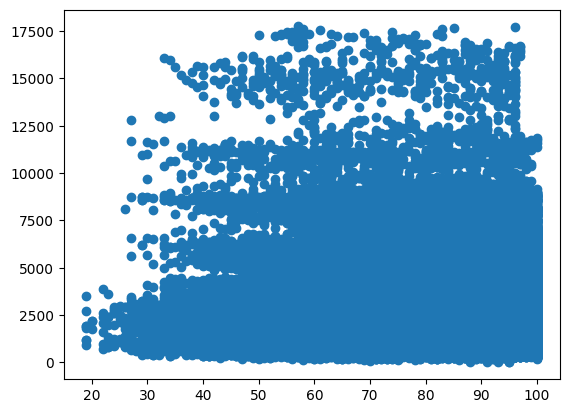

In [ ]:
plt.scatter(df['습도'], df['전력사용량'])
plt.show()

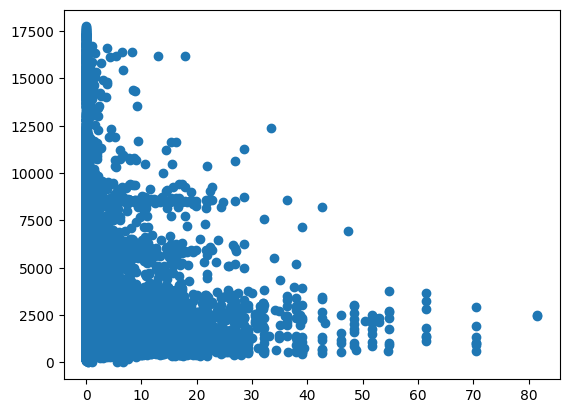

In [ ]:
plt.scatter(df['강수량'], df['전력사용량'])
plt.show()

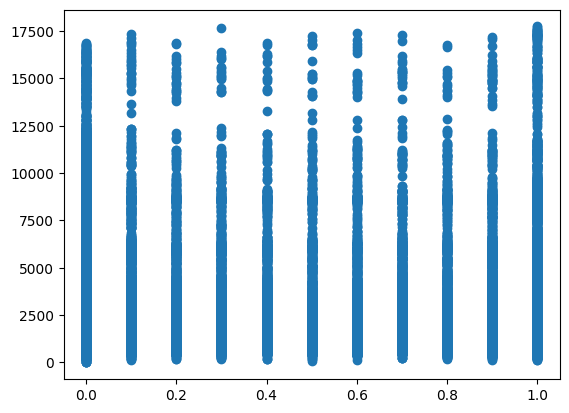

In [ ]:
plt.scatter(df['일조'], df['전력사용량'])
plt.show()

<Axes: >

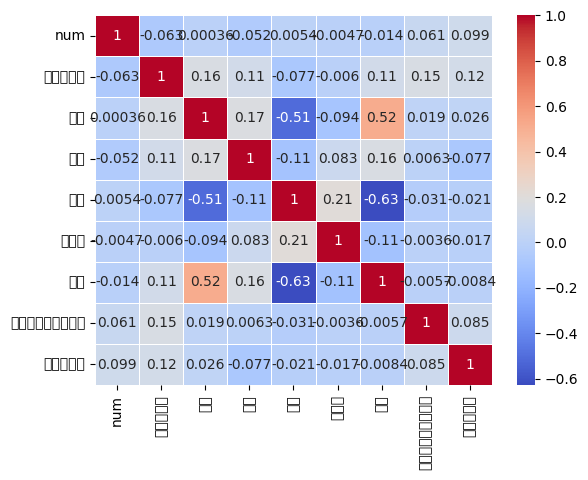

In [ ]:
# 전체 heatmap
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64']) # 숫자형
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:
df['비전기냉방설비운영'].value_counts()

,count
비전기냉방설비운영,
1.0,83640
0.0,38760


In [ ]:
df['태양광보유'].value_counts()

,count
태양광보유,
0.0,63240
1.0,59160


In [ ]:
# describe
df.describe()

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


# 모델링

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import time
import os

In [ ]:
# x, y 나누기
X = df.loc[:, '기온':'일조'].values
y = df['전력사용량'].values

In [ ]:
# Kmeans로 파생변수
kmeans = KMeans(n_clusters=3, random_state=7777)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

In [ ]:
# 데이터 정규화 - Robustscaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_extended[:, :-1] = scaler.fit_transform(X_extended[:, :-1])

In [ ]:
# 데이터 텐서로 변환
X_tensor = torch.tensor(X_extended, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [ ]:
# 레이어, 노드 수 늘리기, dropout 0.5확률 , relu함수 사용, Xaveir로 가중치 초기화
class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(256, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(64, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.5)

        self.layer6 = nn.Linear(64, 128)
        self.bn6 = nn.BatchNorm1d(128)
        self.dropout6 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(128, 1)

        # 가중치 초기화
        self._initialize_weights()

    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)
        x = torch.relu(self.bn5(self.layer5(x)))
        x = self.dropout5(x)
        x = torch.relu(self.bn6(self.layer6(x)))
        x = self.dropout6(x)
        x = self.output_layer(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

In [ ]:
# Hyperparameters
learning_rate = 0.001
weight_decay = 0.1
num_epochs = 10
batch_size = 64

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5,  shuffle=True, random_state=42)
fold = 1

# Early Stopping 설정
early_stopping_patience = 5
early_stopping_counter = 0
best_loss = float('inf')

# 로그 파일 설정
log_file = "training_log.txt"
if os.path.exists(log_file):
    os.remove(log_file)

# 학습 및 평가
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

valid_losses = []
best_loss = float('inf')  # 초기에 가장 큰 값으로 설정
early_stopping_counter = 0

for fold, (train_index, val_index) in enumerate(kf.split(X_tensor), 1):
    X_train_fold, X_valid_fold = X_tensor[train_index], X_tensor[val_index]
    y_train_fold, y_valid_fold = y_tensor[train_index], y_tensor[val_index]

    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = DNNRegression().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

    # 학습 시간 측정 시작
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # 데이터를 GPU로 이동

            # 예측값 계산
            predictions = model(batch_X)

            # 손실 계산
            loss = criterion(predictions, batch_y)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 역전파 및 가중치 갱신
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # 학습률 업데이트
        scheduler.step()

        # 평가 손실 계산
        model.eval()
        with torch.no_grad():
            X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)
            val_predictions = model(X_valid_fold)
            val_loss = criterion(val_predictions, y_valid_fold)

        # 로그 파일에 정보 기록
        with open(log_file, "a") as f:
            f.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}\n")

        # tqdm 진행 표시줄 업데이트
        tqdm.write(f"Fold {fold}, Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Valid Loss: {val_loss.item():.4f}")

        # Early Stopping 및 모델 저장
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            early_stopping_counter = 0
            # 성능이 뛰어날 때마다 모델 저장
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print(f"조기 종료 at epoch {epoch+1}")
                break

    # 평가
    model.load_state_dict(torch.load("best_model.pth"))  # 저장된 최적 모델 로드
    model.eval()
    with torch.no_grad():
        X_valid_fold, y_valid_fold = X_valid_fold.to(device), y_valid_fold.to(device)  # 검증 데이터도 GPU로 이동
        predictions = model(X_valid_fold)
        final_loss = criterion(predictions, y_valid_fold)
        valid_losses.append(final_loss.item())
        print(f'Fold {fold} 평가 손실 Loss: {final_loss.item():.4f}')
        print(f'Fold {fold} 예측값: {predictions[:5].view(-1).tolist()}')
        print(f'Fold {fold} 실제값: {y_valid_fold[:5].view(-1).tolist()}')

# K-fold 결과 출력
print(f"전체 fold에서 평가 손실 목록: {valid_losses}")

Fold 1, Epoch 1/10, Loss: 8549331.6412, Valid Loss: 6707754.0000
Fold 1, Epoch 2/10, Loss: 5466796.9104, Valid Loss: 4512353.0000
Fold 1, Epoch 3/10, Loss: 4597269.6056, Valid Loss: 4408726.5000
Fold 1, Epoch 4/10, Loss: 4515788.7245, Valid Loss: 4364014.5000
Fold 1, Epoch 5/10, Loss: 4470117.2653, Valid Loss: 4339601.0000
Fold 1, Epoch 6/10, Loss: 4463652.6097, Valid Loss: 4381291.5000
Fold 1, Epoch 7/10, Loss: 4464989.6094, Valid Loss: 4368127.5000
Fold 1, Epoch 8/10, Loss: 4459618.6184, Valid Loss: 4368088.0000
Fold 1, Epoch 9/10, Loss: 4464009.4173, Valid Loss: 4361630.5000
Fold 1, Epoch 10/10, Loss: 4452968.2027, Valid Loss: 4311214.5000
Fold 1 평가 손실 Loss: 4311214.5000
Fold 1 예측값: [1781.7587890625, 1787.539306640625, 2.6124982833862305, 2.6124982833862305, 606.8037109375]
Fold 1 실제값: [8179.05615234375, 8048.80810546875, 7945.1279296875, 7836.912109375, 7989.83984375]
Fold 2, Epoch 1/10, Loss: 8536532.8209, Valid Loss: 6657372.5000
Fold 2, Epoch 2/10, Loss: 5460552.6390, Valid Loss

###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.

1. X변수에는 전력사용량을 제외한 연속형변수만 사용, y변수는 전력사용량으로 잡음
2. kmeans를 n수 3개로 하여 파생변수 생성
3. Robust 정규화 (클러스터링한 변수 제외)
4. 데이터 텐서로 변환
5. 레이어, 노드수 각 6개씩, dropout은 0.5확률, relu 함수사용, Xaveir로 가중치 초기화
6. k-fold를 5개로 설정
7. early stopping 5로 설정
8. GPU를 사용(하지만 안됨)
9. Adam으로 옵티마이저 사용
10. Scheduler 사용
11. 검증 손실 평가
12. 조기 종료 및 모델 저장



